[1] 모듈 로딩 및 데이터 준비 <hr>

In [68]:
# ==================================================
# [1-1] 모듈 로딩
# ==================================================
# 기본 모듈
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import koreanize_matplotlib

# ML 데이터셋 및 학습 관련 모듈
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# ML 모델 성능 지표 관련 모듈
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import root_mean_squared_error, r2_score

# CoW 활성화 : 복사와 공유 자동 설정
pd.options.mode.copy_on_write = True

# 판다스/넘파이에 지수표기법(과학적표기법) 정지 설정
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=6, suppress=True)

In [69]:
# ==================================================
# [1-2] 데이터 준비 및 확인
# ==================================================
# 데이터 준비
DATA_FILE = '../Data/world_co2_monthly_1959-01_to_2000-12.csv'
DATA_FILE2 = '../Data/world_co2_monthly_2001-01_to_2013-12.csv'

trainDF = pd.read_csv(DATA_FILE)
testDF  = pd.read_csv(DATA_FILE2)

trainDF['date'] = pd.to_datetime(trainDF['date'])
trainDF['year'] = trainDF['date'].dt.year
trainDF['month'] = trainDF['date'].dt.month

testDF['date'] = pd.to_datetime(testDF['date'])
testDF['year'] = testDF['date'].dt.year
testDF['month'] = testDF['date'].dt.month


display(trainDF.head(3))
display(trainDF.tail(3))
display(testDF.head(3))
display(testDF.tail(3))
trainDF.info()

,date,Value,year,month
0,1959-01-01,315.58000,1959,1
1,1959-02-01,316.48000,1959,2
2,1959-03-01,316.65000,1959,3


,date,Value,year,month
501,2000-10-01,367.18000,2000,10
502,2000-11-01,368.53000,2000,11
503,2000-12-01,369.83000,2000,12


,date,Value,year,month
0,2001-01-01,370.76000,2001,1
1,2001-02-01,371.69000,2001,2
2,2001-03-01,372.63000,2001,3


,date,Value,year,month
153,2013-10-01,393.90000,2013,10
154,2013-11-01,395.36000,2013,11
155,2013-12-01,397.03000,2013,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    504 non-null    datetime64[ns]
 1   Value   504 non-null    float64       
 2   year    504 non-null    int32         
 3   month   504 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(2)
memory usage: 11.9 KB


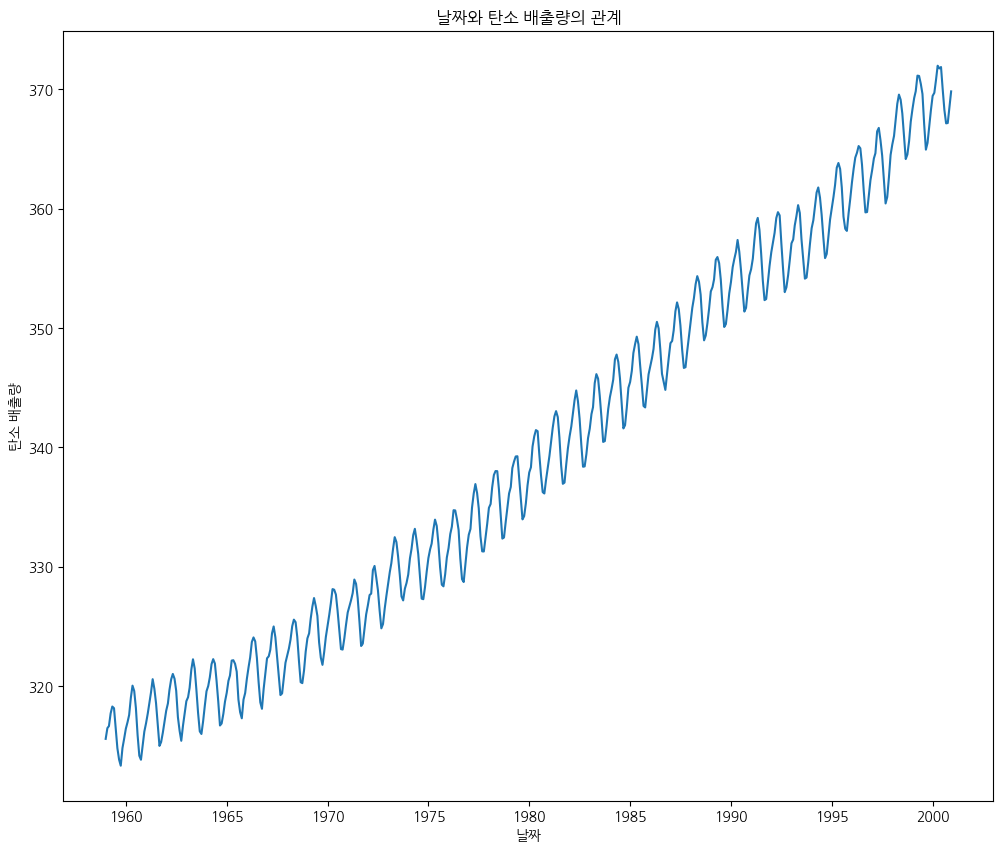

In [70]:
# => 시각화
plt.figure(figsize = (12, 10))
plt.plot(trainDF['date'], trainDF.Value)
plt.title("날짜와 탄소 배출량의 관계")
plt.xlabel('날짜')
plt.ylabel('탄소 배출량')
plt.show()

In [71]:
# [2-1] 피처(2D)와 타겟(1D) 분리 
# 피처 : 날짜, 타겟 : 탄소량
x_train = trainDF[trainDF.columns[2:4]]    # Hour, Count
y_train = trainDF[trainDF.columns[1]]        # Score

print(f'x_train : {x_train.shape}, x_train : {x_train.shape}')
x_train.head(1)

x_train : (504, 2), x_train : (504, 2)


,year,month
0,1959,1


In [72]:
x_test = testDF[testDF.columns[2:4]]    
y_test = testDF[testDF.columns[1]]    

print(f'x_test : {x_test.shape}, y_test : {y_test.shape}')
x_test.head(1)

x_test : (156, 2), y_test : (156,)


,year,month
0,2001,1


[3] 학습 진행 <hr>

In [73]:
# 모델 인스턴스 생성
lrModel = LinearRegression()
lrModel

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [74]:
lrModel.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [75]:
train_score = lrModel.score(x_train, y_train)
test_score  = lrModel.score(x_test, y_test)

print(f'[train_score] {train_score}')
print(f'[test_score]  {test_score}')

[train_score] 0.9799310092872341
[test_score]  -0.009676897297205223
